## 파이썬을 이용한 머신러닝, 딥러닝 실전 앱 개발 
### (P109 ~ P138)


### 문자인식 - 손글씨 숫자 판정하기

* dataset = 8 x 8 픽셀의 손글씨 숫자 데이터 5620개

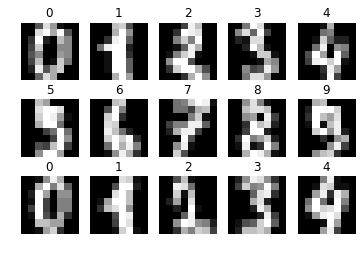

In [9]:
import matplotlib.pyplot as plt

#손글씨 데이터 읽어 들이기 
from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap='gray')


#15개만 출력해 보기







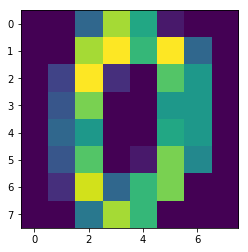

In [11]:
d0 = digits.images[0]
plt.imshow(d0)

### 이미지 머신러닝

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# 데이터 읽어 들이기 --- (*1)

digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape(-1, 64)
print(x.shape)
print(y.shape)


            # 2차원 배열을 1차원 배열로 변환하기 --- (*2) / 8x8 -> 1 x 64

# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*3)
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.3)


# 데이터 학습하기 --- (*4)
            #커널 서포트 백터머신
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기 --- (*5)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

(1797, 64)
(1797,)
0.9425925925925925


C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 학습데이터 저장

In [23]:
joblib.dump(clf, 'digits.pk')

['digits.pk']

In [25]:
# 학습한 데이터 읽기
loaded_clf = joblib.load('digits.pk')
print(loaded_clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


### 이미지 판정하기

https://firealpaca.com/kr/
* 해당링크 다운 후 에서 직접 그려서 저장 후 판정해보기(두껍게, 정중앙으로)

In [1]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
    clf = joblib.load('digits.pk')
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.bitwise_not(my_img)
    
    my_img = my_img.reshape(-1, 64)
    
    res = clf.predict(my_img)
    return res[0]

filename = '2.png'

n = predict_digit(filename)
print('filename = ' + str(n))


# 이미지 파일을 지정해서 실행하기



filename = 4


### 윤곽검출

97 64 30 28
101 9 90 81


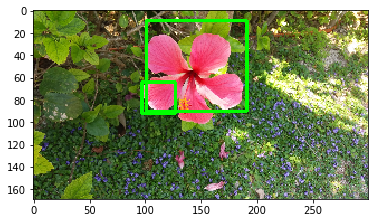

In [7]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽어 들이고 크기 변경하기 --- (*1)
img = cv2.imread('flower.jpg')
img = cv2.resize(img, (300,169))


# 색공간 변경하기 --- (*2)
gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
img2 = cv2.threshold(gray, 140, 250, cv2.THRESH_BINARY_INV)[-1]


# 화면 왼쪽에 변환한 이미지 출력하기 --- (*3)

plt.subplot(121)
plt.imshow(img2, cmap='gray')


# 윤곽 검출하기 --- (*4)
contours = cv2.findContours(img2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]


# 검출한 윤곽 그리기 --- (*5)
for point in contours:
    x, y, w, h = cv2.boundingRect(point)
    if w < 30 or w > 200:
        continue
    
    print(x, y ,w, h)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.subplot(111)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()




# 화면 오른쪽에 결과 출력하기 --- (*6)




### 'hagaki1 이미지 출력해보기'
(책에 없으나, 아래 코드를 이해하는데 도움됨, 생략해도 무관)

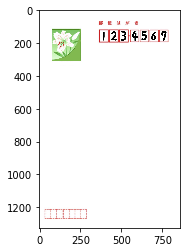

In [8]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('hagaki1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


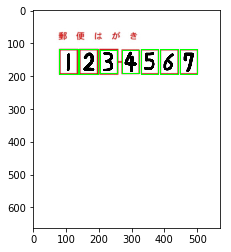

In [26]:
import cv2
import matplotlib.pyplot as plt

def detector(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    img = img[0:h//2, w//3:]
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3,3), 0)
    img2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    contours = cv2.findContours(img2, cv2.RETR_LIST, 
                                cv2.CHAIN_APPROX_SIMPLE)[1]
    result = []
    for point in contours:
        x, y, w, h = cv2.boundingRect(point)
        if not (50 < w < 70):
            continue

        result.append([x,y,w,h])
    
    result = sorted(result, key = lambda x : x[0])
    result2 = []
    lastx = -100
    for x,y,w,h in result:
        if (x - lastx) < 10 :
            continue
        result2.append([x,y,w,h])
        lastx = x
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    for x,y,w,h in result2:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return result2, img

if __name__ == '__main__':
    contours, img = detector('hagaki1.png')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig('detected hagaki1.png')
    plt.show()
        

        

### 바로위 코드만 detect_zip.py으로 저장하기

### 추출한 숫자 이미지 판정하기

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning sc

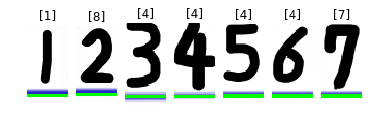

In [31]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib

def detector(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    img = img[0:h//2, w//3:]
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3,3), 0)
    img2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    contours = cv2.findContours(img2, cv2.RETR_LIST, 
                                cv2.CHAIN_APPROX_SIMPLE)[1]
    result = []
    for point in contours:
        x, y, w, h = cv2.boundingRect(point)
        if not (50 < w < 70):
            continue

        result.append([x,y,w,h])
    
    result = sorted(result, key = lambda x : x[0])
    result2 = []
    lastx = -100
    for x,y,w,h in result:
        if (x - lastx) < 10 :
            continue
        result2.append([x,y,w,h])
        lastx = x
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    for x,y,w,h in result2:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return result2, img

clf = joblib.load('digits.pk')
contours, img = detector('hagaki1.png')

for i, point in enumerate(contours):
    x, y, w, h = point
    
    x += 8
    y += 8
    w -= 16
    h -+ 16
    
    img2 = img[y:y+h, x:x+w]
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (8, 8))
    gray = cv2.bitwise_not(gray)
    gray = gray.reshape(-1, 64)
    
    res = clf.predict(gray)
    
    plt.subplot(1,7,i+1)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(res)
    

### 화면에 움직임이 있는 부분 추출하기(p144)
 - 노트북으로 실행
 - cv2.absdiff() : 이미지의 차이 확인

In [2]:
import cv2

cap = cv2.VideoCapture(0)
img_last = None # 이전 프레임을 저장해둘 변수 --- (*1)
green = (0, 255, 0)

while True:
    # 이미지 추출하기
    _, frame = cap.read()
    frame = cv2.resize(frame, (500, 300))
    # 흑백 이미지로 변환하기 --- (*2)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (9, 9), 0)
    img_b = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
    # 차이 확인하기
    if img_last is None:
        img_last = img_b
        continue
    frame_diff = cv2.absdiff(img_last, img_b) # --- (*3)
    cnts = cv2.findContours(frame_diff, 
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[1]
    # 차이가 있는 부분 출력하기 --- (*4)
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if w < 30: continue # 작은 변경은 무시하기
        cv2.rectangle(frame, (x, y), (x+w, y+h), green, 2)
    # 프레임을 변수에 저장해두기 --- (*5)
    img_last = img_b
    # 화면에 출력하기
    cv2.imshow("Diff Camera", frame)
    cv2.imshow("diff data", frame_diff)
    if cv2.waitKey(1) == 27: break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


### 동영상에서 열대어가 나오는 부분 검출하기

In [ ]:
import cv2, os

img_last = None # 이전 프레임을 저장할 변수
no = 0 # 이미지 장 수
save_dir = "./exfish" # 저장 디렉터리 이름
os.mkdir(save_dir) # 디렉터리 만들기

# 동영상 파일로부터 입력받기 --- (*1)
cap = cv2.VideoCapture("fish.mp4")
while True:
    # 이미지 추출하기
    is_ok, frame = cap.read()
    if not is_ok: break
    frame = cv2.resize(frame, (640, 360))
    # 흑백 이미지로 변환하기 --- (*2)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (15, 15), 0)
    img_b = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
    # 차이 확인하기
    if not img_last is None:
        frame_diff = cv2.absdiff(img_last, img_b) # --- (*3)
        cnts = cv2.findContours(frame_diff, 
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[1]
        # 차이가 있는 부분을 파일로 출력하기 --- (*4)
        for pt in cnts:
            x, y, w, h = cv2.boundingRect(pt)
            if w < 100 or w > 500: continue # 노이즈 제거하기
            # 추출한 영역 저장하기
            imgex = frame[y:y+h, x:x+w]
#             outfile = save_dir + "/" + str(no) + ".jpg"
#             cv2.imwrite(outfile, imgex)
            cv2.imshow('fish?', imgex)
            cv2.waitKey(50)
            no += 1
    img_last = img_b
cap.release()
print("ok")

### 학습이미지 준비하기 
 (1) 열대어가 나오는이미지와, 나오지 않는 이미지 각 fish / nofish로 150장 뽑기

### 머신러닝으로 동영상에서 열대어가 많이 나오는 부분 찾기

In [1]:
import cv2
import os, glob
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# 이미지 학습 크기와 경로 지정하기
image_size = (64, 32)
path = os.path.dirname(os.path.abspath("__file__"))
path_fish = path + '/fish'
path_nofish = path + '/nofish'
print(path_nofish)
x = [] # 이미지 데이터
y = [] # 레이블 데이터

# 이미지 데이터를 읽어 들이고 배열에 넣기 --- (*1)
def read_dir(path, label):
    files = glob.glob(path + "/*.jpg")
    
    for f in files:
        img = cv2.imread(f)
        img = cv2.resize(img, image_size)
        img_data = img.reshape(-1, ) # 1차원으로 전개하기
        x.append(img_data)
        y.append(label)

# 이미지 데이터 읽어 들이기
read_dir(path_nofish, 0)
read_dir(path_fish, 1)

# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 데이터 학습하기 --- (*3)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# 정답률 확인하기 --- (*4)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

# 데이터 저장하기 --- (*5)
joblib.dump(clf, 'fish.pkl')

C:\Users\student\J1\A.I_Image\OpenCV\Day 5/nofish


C:\Users\student\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 동영상분석하기

In [3]:
import cv2, os, copy
from sklearn.externals import joblib

# 학습한 데이터 읽어 들이기
clf = joblib.load("fish.pkl")
output_dir = "./bestshot"
img_last = None # 이전 프레임을 저장할 변수
fish_th = 3 # 이미지로 출력할 기준이 되는 물고기 수
count = 0
frame_count = 0
if not os.path.isdir(output_dir): os.mkdir(output_dir)

# 동영상 파일로부터 입력받기 --- (*1)
cap = cv2.VideoCapture("fish.mp4")
while True:
    # 이미지 추출하기
    is_ok, frame = cap.read()
    if not is_ok: break
    frame = cv2.resize(frame, (640, 360))
    frame2 = copy.copy(frame)
    frame_count += 1
    # 이전 프레임과 비교를 위해 흑백으로 변환하기 --- (*2)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (15, 15), 0)
    img_b = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
    if not img_last is None:
        # 차이 추출하기
        frame_diff = cv2.absdiff(img_last, img_b)
        cnts = cv2.findContours(frame_diff, 
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[1]
        # 차이가 있는 부분에 물고기가 있는지 확인하기
        fish_count = 0
        for pt in cnts:
            x, y, w, h = cv2.boundingRect(pt)
            if w < 100 or w > 500: continue # 노이즈 제거하기
            # 추출한 영역에 물고기가 있는지 확인하기 --- (*3)
            imgex = frame[y:y+h, x:x+w]
            imagex = cv2.resize(imgex, (64, 32))
            image_data = imagex.reshape(-1, )
            pred_y = clf.predict([image_data]) # --- (*4)
            if pred_y[0] == 1:
                fish_count += 1
                cv2.rectangle(frame2, (x, y), (x+w, y+h), (0,255,0), 2)
        # 물고기가 많이 있는지 확인하기 --- (*5)
        if fish_count > fish_th:
            fname = output_dir + "/fish" + str(count) + ".jpg"
            cv2.imwrite(fname, frame)
            count += 1
    cv2.imshow('FISH!', frame2)
    if cv2.waitKey(1) == 13: break
    img_last = img_b
cap.release()
cv2.destroyAllWindows()
print("ok", count, "/", frame_count)

ok 92 / 1983
